<div dir="rtl" style="text-align: right;">

# تحليل بيانات توصيات يوتيوب (YouTube Recommendation Dataset)
الداتا دي عبارة عن مجموعة بيانات بتمثل فيديوهات يوتيوب وطريقة ظهورها في التوصيات.
كل صف بيمثل فيديو واحد، ومعاه معلومات عن القناة، عدد المشاهدات، الإعجابات، التعليقات، مدة الفيديو، والتصنيف


اليوتيوب بيعتمد على خوارزميات توصية معقدة.

إيه اللي بيخلي فيديو يوصل لناس أكتر؟

هل مدة الفيديو ليها علاقة بعدد المشاهدات؟

هل التفاعل (لايكات / تعليقات) مرتبط بالانتشار؟

---



في الجزء ده هنبدأ بقراءة ملف الداتا ونشوف شكله العام.
الهدف إننا نفهم الأعمدة، أنواع البيانات، وعدد الصفوف قبل ما نلمس أي حاجة أو نعدّل عليها.

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/youtube recommendation dataset.csv')
df.head()

,user_id,video_id,video_duration,watch_time,liked,commented,subscribed_after,category,device,watch_time_of_day,recommended,clicked,timestamp,watch_percent
0,88263,19387,1499,1499.0,1,0,0,News,TV,Night,0,0,2025-07-16 06:10:54,1.000000
1,46796,5150,2955,2955.0,1,0,0,Education,Mobile,Night,1,1,2024-07-09 10:22:22,1.000000
2,77686,3172,389,389.0,0,0,0,Sports,Desktop,Afternoon,0,0,2025-02-07 09:46:36,1.000000
3,26723,27669,1231,1231.0,1,1,0,Gaming,TV,Evening,0,0,2024-04-28 08:07:13,1.000000
4,55299,24612,3573,353.0,0,1,0,Lifestyle,Desktop,Evening,1,0,2024-03-30 12:54:24,0.098797


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 14 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   user_id            1000000 non-null  int64  
 1   video_id           1000000 non-null  int64  
 2   video_duration     1000000 non-null  int64  
 3   watch_time         1000000 non-null  float64
 4   liked              997952 non-null   object 
 5   commented          1000000 non-null  int64  
 6   subscribed_after   1000000 non-null  int64  
 7   category           1000000 non-null  object 
 8   device             1000000 non-null  object 
 9   watch_time_of_day  1000000 non-null  object 
 10  recommended        1000000 non-null  int64  
 11  clicked            1000000 non-null  int64  
 12  timestamp          1000000 non-null  object 
 13  watch_percent      1000000 non-null  float64
dtypes: float64(2), int64(7), object(5)
memory usage: 106.8+ MB


<div dir="rtl" style="text-align: right;">

بعد استخدام head() و info() لفحص الداتا، ظهر إن الملف يحتوي على مليون صف و14 عمود.
الأعمدة متنوعة بين بيانات رقمية، ونصية، وقيم منطقية.



من النظرة الأولى، نقدر نلاحظ إن:
 عمود
(liked) فيه قيم ناقصة.

بعض الأعمدة ممثلة كـ أرقام، لكنها في الحقيقة قيم منطقية
(Boolean).




In [ ]:
df['liked'].value_counts()


,count
liked,
0,696155
1,298845
2,1007
no,988
yes,957


<div dir="rtl" style="text-align: right;">

بعد فحص القيم الموجودة في عمود <b>liked</b> باستخدام <code>value_counts()</code>، اتضح إن العمود مش موحد في القيم.

العمود بيحتوي على أكتر من تمثيل لنفس المعنى.

ده معناه إن العمود محتاج معالجة قبل ما يتحول لنوع Boolean.

الخطوة الجاية هتكون:
- توحيد كل القيم بحيث تمثل حالتين فقط
- تحويل <b>yes</b> إلى 1 و <b>no</b> إلى 0
- التعامل مع القيم غير المنطقية زي 2
- ملء القيم الناقصة بقيمة مناسبة قبل تحويل نوع البيانات

</div>


In [ ]:
df['liked']=df['liked'].replace({'yes': 1,'no':0, '2':1}).fillna(False)
df['liked'].value_counts()

,count
liked,
0,696155
1,298845
0,3036
1,1964


<div dir="rtl" style="text-align: right;">

بعد فحص القيم الموجودة في أعمدة التفاعل، اتضح إن الأعمدة:
<b>liked</b>، <b>commented</b>، <b>subscribed_after</b>، <b>recommended</b>، و <b>clicked</b>  
بتمثل حالات منطقية (حصل / ما حصلش).

علشان كده، الخطوة الجاية هتكون تحويل الأعمدة دي لنوع البيانات Boolean،  
وده هيخلّي الداتا أوضح وأسهل في التحليل، خصوصًا عند حساب النسب والمقارنات.

التحويل هيتم باستخدام <code>astype(bool)</code> بعد التأكد إن القيم مناسبة للتمثيل المنطقي.

</div>


In [ ]:
df[['liked','commented', 'subscribed_after', 'recommended', 'clicked']]=df[['liked','commented', 'subscribed_after', 'recommended', 'clicked']].astype(bool)

In [ ]:
df['watch_time']=df['watch_time'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 14 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   user_id            1000000 non-null  int64  
 1   video_id           1000000 non-null  int64  
 2   video_duration     1000000 non-null  int64  
 3   watch_time         1000000 non-null  int64  
 4   liked              1000000 non-null  bool   
 5   commented          1000000 non-null  bool   
 6   subscribed_after   1000000 non-null  bool   
 7   category           1000000 non-null  object 
 8   device             1000000 non-null  object 
 9   watch_time_of_day  1000000 non-null  object 
 10  recommended        1000000 non-null  bool   
 11  clicked            1000000 non-null  bool   
 12  timestamp          1000000 non-null  object 
 13  watch_percent      1000000 non-null  float64
dtypes: bool(5), float64(1), int64(4), object(4)
memory usage: 73.4+ MB


In [ ]:
print(df['category'].unique())

['News' 'Education' 'Sports' 'Gaming' 'Lifestyle' 'Music' 'Tech' 'Comedy'
 'MUsic' 'gamingg' 'music' 'Ed' 'COMEDY' 'Tech ']


<div dir="rtl" style="text-align: right;">

بعد فحص القيم المختلفة في عمود <b>category</b> باستخدام <code>unique()</code>، اتضح إن العمود فيه عدم توحيد في القيم.

نلاحظ وجود نفس الفئة مكتوبة بأكتر من شكل، زي:
- اختلاف في حالة الحروف (Music / music / MUsic / COMEDY)
- أخطاء إملائية (gamingg)
- مسافات زيادة (Tech )
- اختصارات غير واضحة (Ed)

ده معناه إن نفس الفئة متقسمة على كذا قيمة، وده هيأثر بشكل مباشر على أي تحليل أو إحصائيات خاصة بالفئات.

علشان كده، الخطوة الجاية هتكون:
- توحيد أسماء الفئات
- تصحيح الأخطاء الإملائية
- إزالة المسافات الزيادة
بحيث كل فئة تبقى ممثلة بقيمة واحدة واضحة.

بعد الخطوة دي، عمود <b>category</b> هيبقى نظيف وجاهز للتحليل.

</div>


In [ ]:
df['category']=df['category'].replace({'COMEDY':'Comedy','MUsic':'Music','music':'Music','Ed':'Education','gamingg':'Gaming','Tech ':'Tech'})
df['category'].unique()

array(['News', 'Education', 'Sports', 'Gaming', 'Lifestyle', 'Music',
       'Tech', 'Comedy'], dtype=object)

<div dir="rtl" style="text-align: right;">

في المرحلة دي هنجهّز الأعمدة الزمنية بحيث تبقى أسهل في الفهم والتحليل، من غير ما نغيّر القيم الأصلية أو ترتيب الأعمدة.

التعديلات اللي هتتم في الخطوة الجاية:

عمود <b>timestamp</b> بيجمع التاريخ والوقت في قيمة واحدة، وده بيقيّد التحليل. هنفصله لعمودين:

عمود للتاريخ

عمود للوقت

الهدف من الخطوة دي إن الداتا تبقى أوضح أثناء التحليل والرسم، مع الحفاظ الكامل على المعنى والقيم الأصلية، لأن التركيز هنا على التحليل مش العرض.

</div>

In [ ]:
# نحاول الأول نحول القيم النصية العادية
converted = pd.to_datetime(df['timestamp'], errors='coerce')

# (Unix numbers) نحدد
mask = converted.isna()

# نحول القيم الرقمية بوحدة الثواني
converted[mask] = pd.to_datetime(df.loc[mask, 'timestamp'], unit='s')

# نرجع العمود بعد التنظيف
df['timestamp'] = converted


/tmp/ipython-input-2798840771.py:8: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  converted[mask] = pd.to_datetime(df.loc[mask, 'timestamp'], unit='s')


<div dir="rtl" style="text-align: right;">


في الخطوة الى فاتت حاولت أحوّل عمود timestamp إلى نوع تاريخ باستخدام:


```
df['timestamp'] = pd.to_datetime(df['timestamp'])
```
لكن التحويل ما اشتغلش بالشكل المتوقع، وظهر إن فيه قيم اتحولت لـ NaT، وده معناه إن في قيم مش متوافقة مع طريقة التحويل الافتراضية.

عشان أحدد السبب، قررت أفحص القيم اللي فشل تحويلها وأراجع شكلها الفعلي. من الفحص اكتشفت إن القيم مش مكتوبة بصيغة تاريخ تقليدية، لكنها أرقام كبيرة بتمثل Unix timestamp (عدد الثواني منذ 1970).

بالتالي المشكلة ما كانتش في البيانات، لكن في طريقة التحويل.
والحل الصحيح هو تحديد وحدة الوقت أثناء التحويل باستخدام unit='s'.


</div>

In [ ]:
df['date'] = df['timestamp'].dt.date.astype('datetime64[ns]')
df['time'] = df['timestamp'].dt.time
df['hour'] = df['timestamp'].dt.hour
df['hour'] = df['hour'].astype('Int64')
df.drop(columns=['timestamp'], inplace=True)
df


,user_id,video_id,video_duration,watch_time,liked,commented,subscribed_after,category,device,watch_time_of_day,recommended,clicked,watch_percent,date,time,hour
0,88263,19387,1499,1499,True,False,False,News,TV,Night,False,False,1.000000,2025-07-16,06:10:54,6
1,46796,5150,2955,2955,True,False,False,Education,Mobile,Night,True,True,1.000000,2024-07-09,10:22:22,10
2,77686,3172,389,389,True,False,False,Sports,Desktop,Afternoon,False,False,1.000000,2025-02-07,09:46:36,9
3,26723,27669,1231,1231,True,True,False,Gaming,TV,Evening,False,False,1.000000,2024-04-28,08:07:13,8
4,55299,24612,3573,353,True,True,False,Lifestyle,Desktop,Evening,True,False,0.098797,2024-03-30,12:54:24,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,30850,24888,2390,1902,True,False,False,Sports,Tablet,Morning,False,False,0.795816,2024-01-09,16:41:36,16
999996,14324,3681,311,311,True,False,False,Education,TV,Evening,False,False,1.000000,2024-03-14,22:22:54,22
999997,963,11107,2472,2472,True,False,False,Tech,Tablet,Evening,False,False,1.000000,2023-09-06,08:54:24,8
999998,87484,40134,1725,1725,True,False,True,News,Mobile,Night,True,False,1.000000,2025-03-28,01:31:39,1


<div dir="rtl" style="text-align: right;">

---

#في المرحلة دي أقدر أقول إني خلصت تنظيف المشاكل الواضحة في الداتا، زي أنواع البيانات غير الصحيحة، القيم الناقصة، وتوحيد القيم المتكررة في الأعمدة النصية.

الخطوة الجاية هتكون التأكد من جودة الداتا نفسها، مش بس شكلها. يعني هبدأ أراجع الحاجات اللي مش باينة من أول نظرة

---


</div>

<div dir="rtl" style="text-align: right;">


 التأكد إن watch_time مايزيدش عن video_duration.




</div>






In [ ]:
(df['watch_time'] > df['video_duration']).sum()

np.int64(4500)

<div dir="rtl" style="text-align: right;">

تم اكتشاف 4500 صف حيث يكون وقت المشاهدة (<code>watch_time</code>) أكبر من مدة الفيديو الكلية (<code>video_duration</code>). هذا غير منطقي ويشير إلى وجود بيانات غير صحيحة.

لتصحيح هذه البيانات، سيتم تعديل <code>watch_time</code> ليساوي <code>video_duration</code> في جميع الصفوف التي تحتوي على هذا التناقض.

</div>

In [ ]:
df.loc[df['watch_time'] > df['video_duration'], 'watch_time'] = df['video_duration']

<div dir="rtl" style="text-align: right;">

التأكد من أن watch_percent متناسق فعليًا مع وقت المشاهدة.

 هيتم تنسيقه ليظهر لحد رقمين عشريين فقط، مع التعبير عنه كنسبة مئوية (%) لتسهيل التحليل الإحصائي.

</div>

In [ ]:
df['watch_percent'] = df.apply(lambda row: row['watch_time'] / row['video_duration'] if row['video_duration'] != 0 else 0, axis=1)
df['watch_percent'] = df['watch_percent'].round(2)

In [ ]:
df

,user_id,video_id,video_duration,watch_time,liked,commented,subscribed_after,category,device,watch_time_of_day,recommended,clicked,watch_percent,date,time,hour
0,88263,19387,1499,1499,True,False,False,News,TV,Night,False,False,1.0,2025-07-16,06:10:54,6
1,46796,5150,2955,2955,True,False,False,Education,Mobile,Night,True,True,1.0,2024-07-09,10:22:22,10
2,77686,3172,389,389,True,False,False,Sports,Desktop,Afternoon,False,False,1.0,2025-02-07,09:46:36,9
3,26723,27669,1231,1231,True,True,False,Gaming,TV,Evening,False,False,1.0,2024-04-28,08:07:13,8
4,55299,24612,3573,353,True,True,False,Lifestyle,Desktop,Evening,True,False,0.1,2024-03-30,12:54:24,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,30850,24888,2390,1902,True,False,False,Sports,Tablet,Morning,False,False,0.8,2024-01-09,16:41:36,16
999996,14324,3681,311,311,True,False,False,Education,TV,Evening,False,False,1.0,2024-03-14,22:22:54,22
999997,963,11107,2472,2472,True,False,False,Tech,Tablet,Evening,False,False,1.0,2023-09-06,08:54:24,8
999998,87484,40134,1725,1725,True,False,True,News,Mobile,Night,True,False,1.0,2025-03-28,01:31:39,1


<div dir="rtl" style="text-align: right;">


#الأسئلة دي بتساعدنا نكشف أي أخطاء حسابية أو تسجيل غير منطقي في البيانات قبل ما نبدأ التحليل الفعلي.

</div>


<div dir="rtl" style="text-align: right;">


- هل في أي قيمة في <b>watch_time</b> أكبر من <b>video_duration</b>؟

</div>


In [ ]:
(df['watch_time'] > df['video_duration']).sum()

np.int64(0)

<div dir="rtl" style="text-align: right;">


- هل في أي قيمة في <b>watch_percent</b> أقل من 0 أو أكبر من 1؟


</div>


In [ ]:
((df['watch_percent'] < 0) | (df['watch_percent'] > 1)).sum()


np.int64(0)

<div dir="rtl" style="text-align: right;">

- هل في أي قيمة في <b>video_duration</b> تساوي صفر؟


</div>


In [ ]:
(df['video_duration'] == 0).sum()

np.int64(1000)

<div dir="rtl" style="text-align: right;">

تم اكتشاف وجود 1000 صف قيمة <b>video_duration</b> فيها تساوي صفر.

من الضروري التحقق من هذه الحالات قبل اتخاذ أي قرار.

</div>


In [ ]:
df[df['video_duration'] == 0]['watch_time'].sum()


np.int64(0)

<div dir="rtl" style="text-align: right;">



تم اتخاذ قرار بحذف هذه الصفوف لضمان دقة التحليل وعدم تشويه النتائج.

</div>


In [ ]:
df = df[df['video_duration'] > 0]

<div dir="rtl" style="text-align: right;">

# االبحث عن القيم الشاذة (Outliers)

</div>


In [ ]:
df[['video_duration','watch_time']].describe()

,video_duration,watch_time
count,999000.000000,999000.000000
mean,1913.490622,1262.318094
std,3271.361691,2365.973438
min,30.000000,-299.000000
25%,923.000000,497.000000
50%,1817.000000,1068.000000
75%,2711.000000,1814.000000
max,100000.000000,100000.000000


In [ ]:
df = df[df['watch_time'] > 0]
df = df[df['video_duration'] < 100000]

<div dir="rtl" style="text-align: right;">


1.  **حذف الصفوف ذات `watch_time` أقل من صفر**:

       من غير المنطقي أن يكون وقت المشاهدة  قيمة سالبة.

2.  **حذف الصفوف ذات `video_duration` أكبر من أو تساوي 100000**:   
    القيم الكبيرة جدًا لمدة الفيديو تم حذف هذه الصفوف لضمان أن قيم مدة الفيديو تقع ضمن نطاق معقول.

هذه الإجراءات أسهمت في تنظيف البيانات وجعلها أكثر منطقية وجاهزية للتحليل.
</div>

In [ ]:
df.reset_index(inplace=True)
df[['video_duration','watch_time']].describe()

,video_duration,watch_time
count,998000.000000,998000.000000
mean,1815.207546,1213.554765
std,1030.833417,846.007540
min,30.000000,5.000000
25%,922.000000,498.000000
50%,1816.000000,1068.000000
75%,2708.000000,1813.000000
max,3599.000000,3599.000000


<div dir="rtl" style="text-align: right;">


---



# سنبدأ الآن مرحلة التحليل الاستكشافي للبيانات (EDA) باستخدام الرسوم البيانية، بهدف فهم التوزيعات العامة، واكتشاف الأنماط الزمنية، وتحليل العلاقات بين المتغيرات، ورصد أي قيم شاذة أو سلوك غير طبيعي داخل البيانات.



---


</div>:

<div dir="rtl" style="text-align: right;">

### رسم بياني لمتوسط نسبة المشاهدة حسب ساعة اليوم

</div>:

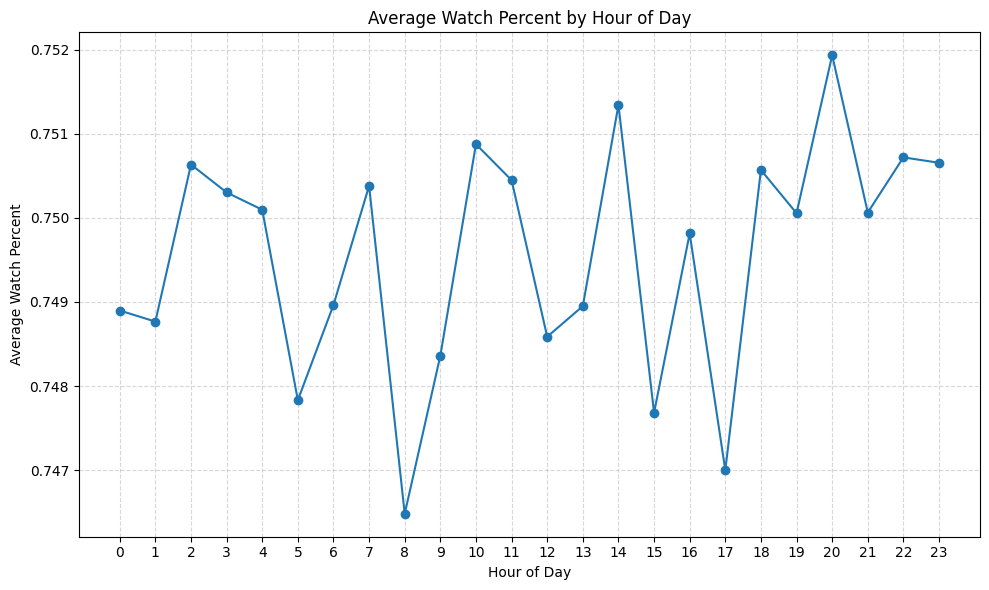

In [ ]:
import matplotlib.pyplot as plt
average_watch_percent_by_hour = average_watch_percent_by_hour.sort_index()
plt.figure(figsize=(10, 6))
plt.plot(
    average_watch_percent_by_hour.index,
    average_watch_percent_by_hour.values,
    marker='o'
)
plt.title('Average Watch Percent by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Watch Percent')
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


<div dir="rtl" style="text-align: right;">

## متوسط نسبة المشاهدة حسب الجهاز
</div>

In [ ]:
average_watch_percent_by_device = df.groupby('device')['watch_percent'].mean()
print(average_watch_percent_by_device)

device
Desktop    0.749498
Mobile     0.749380
TV         0.749272
Tablet     0.750072
Name: watch_percent, dtype: float64


/tmp/ipython-input-1033833951.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(


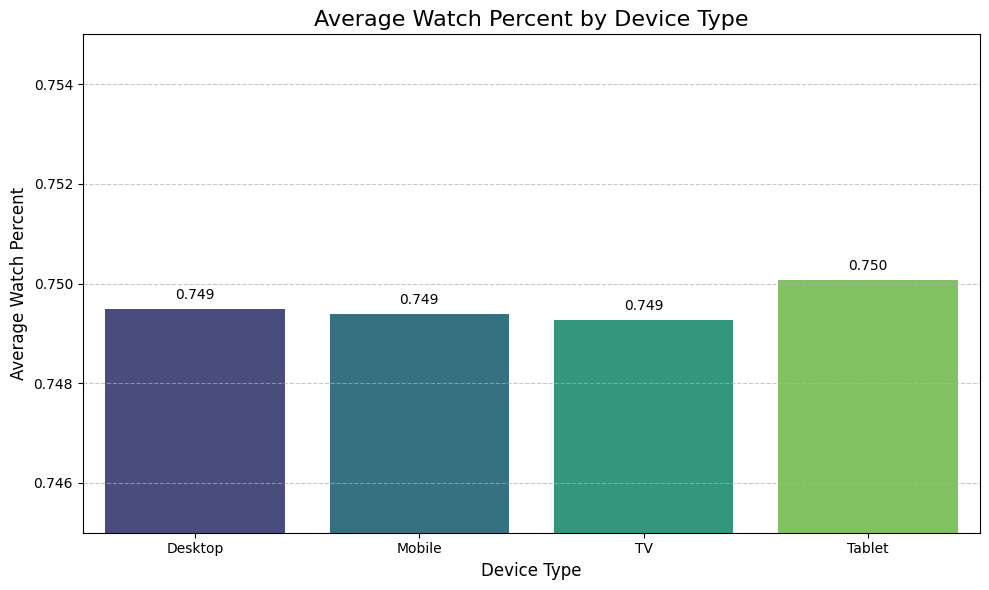

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 6))
bars = sns.barplot(
    x=average_watch_percent_by_device.index,
    y=average_watch_percent_by_device.values,
    palette='viridis'
)
plt.title('Average Watch Percent by Device Type', fontsize=16)
plt.xlabel('Device Type', fontsize=12)
plt.ylabel('Average Watch Percent', fontsize=12)
plt.ylim(0.745, 0.755)
plt.grid(axis='y', linestyle='--', alpha=0.7)


for bar in bars.patches:
    height = bar.get_height()
    bars.annotate(f'{height:.3f}',
                  xy=(bar.get_x() + bar.get_width() / 2, height),
                  xytext=(0, 5),  # 5 pixels فوق العمود
                  textcoords='offset points',
                  ha='center', va='bottom',
                  fontsize=10)

plt.tight_layout()
plt.show()



<div dir="rtl" style="text-align: right;">

## متوسط نسبة المشاهدة حسب الفئة (Category)
</div>

/tmp/ipython-input-2726754635.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(


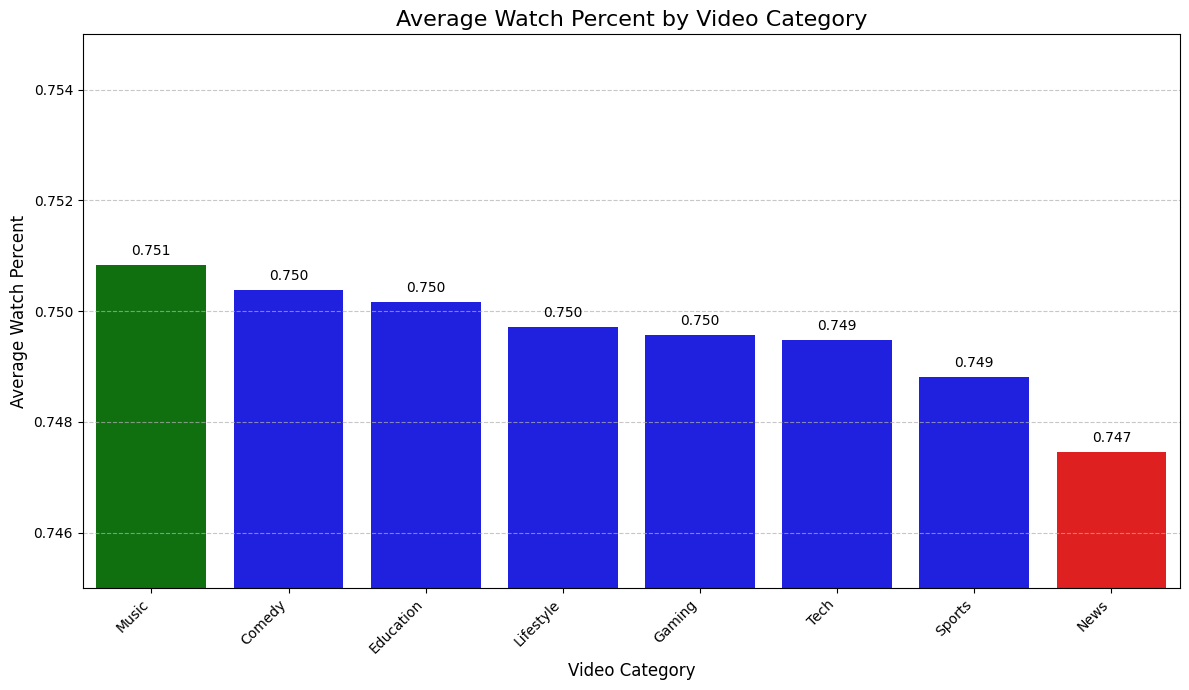

In [ ]:

average_watch_percent_by_category = average_watch_percent_by_category.sort_values(ascending=False)
plt.figure(figsize=(12, 7))
bars = sns.barplot(
    x=average_watch_percent_by_category.index,
    y=average_watch_percent_by_category.values,
    palette=['green' if i==0 else 'red' if i==len(average_watch_percent_by_category)-1 else 'blue'
             for i in range(len(average_watch_percent_by_category))]
)
plt.title('Average Watch Percent by Video Category', fontsize=16)
plt.xlabel('Video Category', fontsize=12)
plt.ylabel('Average Watch Percent', fontsize=12)
plt.ylim(0.745, 0.755)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right', fontsize=10)
for bar in bars.patches:
    height = bar.get_height()
    bars.annotate(f'{height:.3f}',
                  xy=(bar.get_x() + bar.get_width() / 2, height),
                  xytext=(0, 5),
                  textcoords='offset points',
                  ha='center', va='bottom',
                  fontsize=10)
plt.tight_layout()
plt.show()



<div dir="rtl" style="text-align: right;">

## حساب نسبة الإعجابات (Liked) حسب اكتمال المشاهدة
</div>

/tmp/ipython-input-1489194177.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


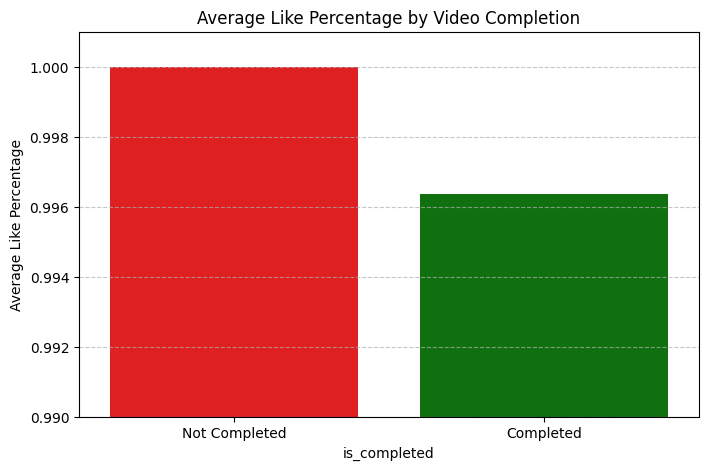

In [ ]:
df['is_completed'] = df['watch_percent'] == 1
average_liked_by_completion = df.groupby('is_completed')['liked'].mean()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(
    x=average_liked_by_completion.index,
    y=average_liked_by_completion.values,
    palette=['red', 'green']
)
plt.xticks(ticks=[0, 1], labels=['Not Completed', 'Completed'])
plt.ylim(0.99, 1.001)
plt.title('Average Like Percentage by Video Completion')
plt.ylabel('Average Like Percentage')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()





<div dir="rtl" style="text-align: right;">

## تحديد المشاهدين الكثيفين والخفيفين
</div>

In [ ]:
q25, q75 = df['watch_time'].quantile([0.25, 0.75])

light_viewers_df = df[df['watch_time'] <= q25]
heavy_viewers_df = df[df['watch_time'] >= q75]

print(len(light_viewers_df), len(heavy_viewers_df))


249958 249693



<div dir="rtl" style="text-align: right;">

## مقارنة نسب الاشتراك (Subscribed) بين المجموعتين
</div>

In [ ]:
avg_subscribed_heavy = heavy_viewers_df['subscribed_after'].mean()
avg_subscribed_light = light_viewers_df['subscribed_after'].mean()

# Combine into a Series for easier plotting
subscribed_comparison = pd.Series({
    'Heavy Viewers': avg_subscribed_heavy,
    'Light Viewers': avg_subscribed_light
})

print(subscribed_comparison)

Heavy Viewers    0.050029
Light Viewers    0.049892
dtype: float64


/tmp/ipython-input-2882040385.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


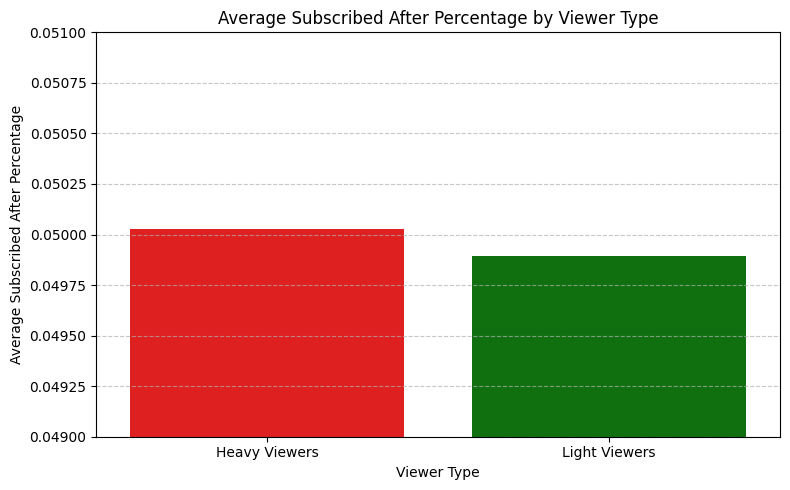

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(
    x=subscribed_comparison.index,
    y=subscribed_comparison.values,
    palette=['red', 'green']  # light viewers = red, heavy viewers = green
)
plt.title('Average Subscribed After Percentage by Viewer Type')
plt.xlabel('Viewer Type')
plt.ylabel('Average Subscribed After Percentage')
plt.ylim(0.049, 0.051)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



<div dir="rtl" style="text-align: right;">

## مقارنة نسب الإعجابات (Liked) بين المجموعتين
</div>

/tmp/ipython-input-3992110168.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


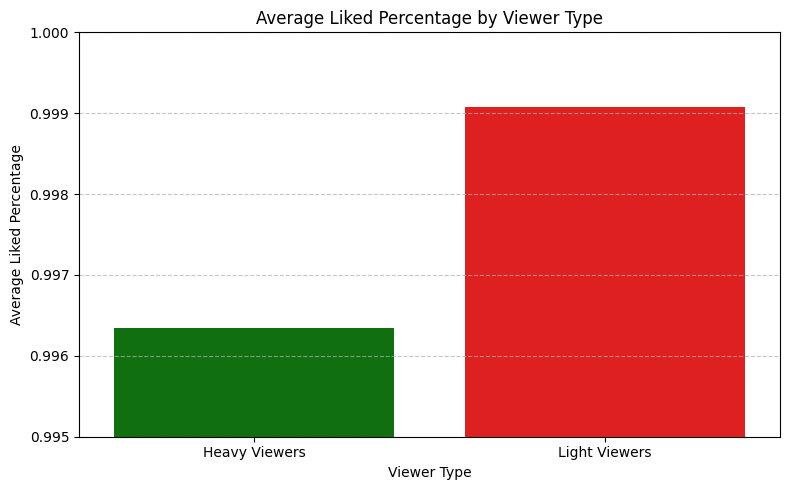

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(
    x=liked_comparison.index,
    y=liked_comparison.values,
    palette=['green', 'red']  # Heavy Viewers = green, Light Viewers = red
)
plt.title('Average Liked Percentage by Viewer Type')
plt.xlabel('Viewer Type')
plt.ylabel('Average Liked Percentage')
plt.ylim(0.995, 1.000)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



<div dir="rtl" style="text-align: right;">

## تحليل استخدام الجهاز (Device) بين المجموعتين
</div>

/tmp/ipython-input-1643818808.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=heavy_device_distribution.index, y=heavy_device_distribution.values, palette='viridis')
/tmp/ipython-input-1643818808.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=light_device_distribution.index, y=light_device_distribution.values, palette='magma')


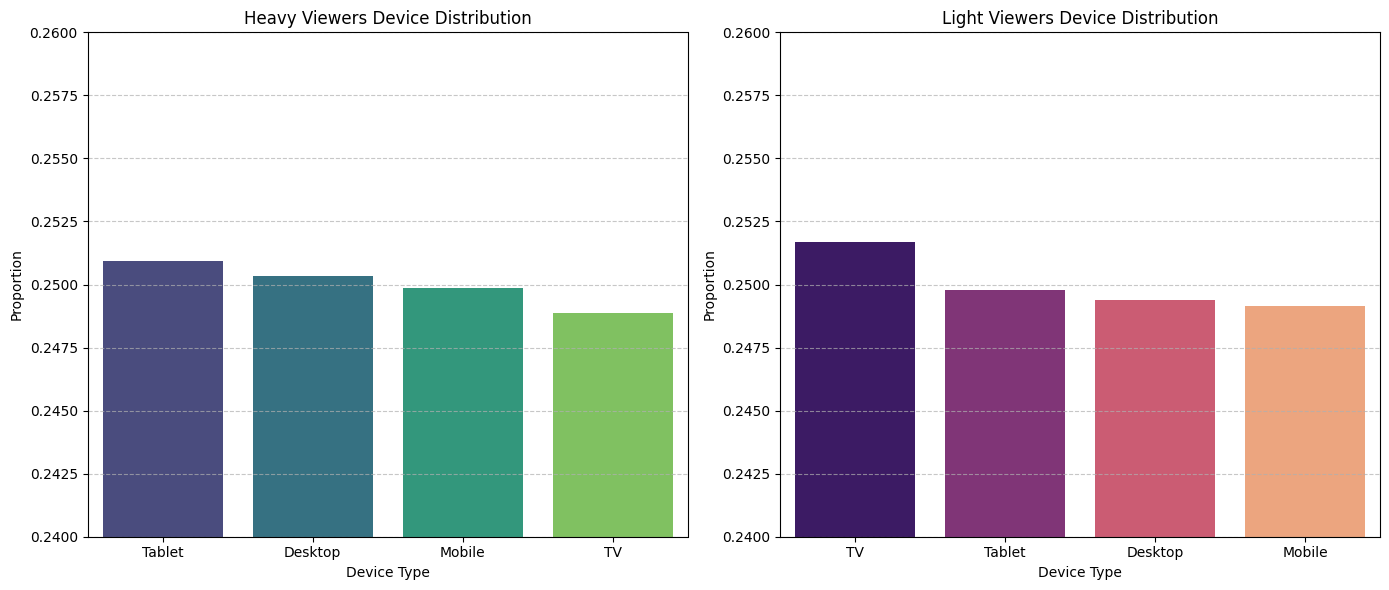

In [ ]:
heavy_device_distribution = heavy_viewers_df['device'].value_counts(normalize=True)
light_device_distribution = light_viewers_df['device'].value_counts(normalize=True)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=heavy_device_distribution.index, y=heavy_device_distribution.values, palette='viridis')
plt.title('Heavy Viewers Device Distribution')
plt.xlabel('Device Type')
plt.ylabel('Proportion')
plt.ylim(0.24, 0.26)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.subplot(1, 2, 2)
sns.barplot(x=light_device_distribution.index, y=light_device_distribution.values, palette='magma')
plt.title('Light Viewers Device Distribution')
plt.xlabel('Device Type')
plt.ylabel('Proportion')
plt.ylim(0.24, 0.26)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<div dir="rtl" style="text-align: right;">

## تحليل توقيت المشاهدة (Watch Time of Day) بين المجموعتين
</div>

/tmp/ipython-input-1396048529.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-1396048529.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


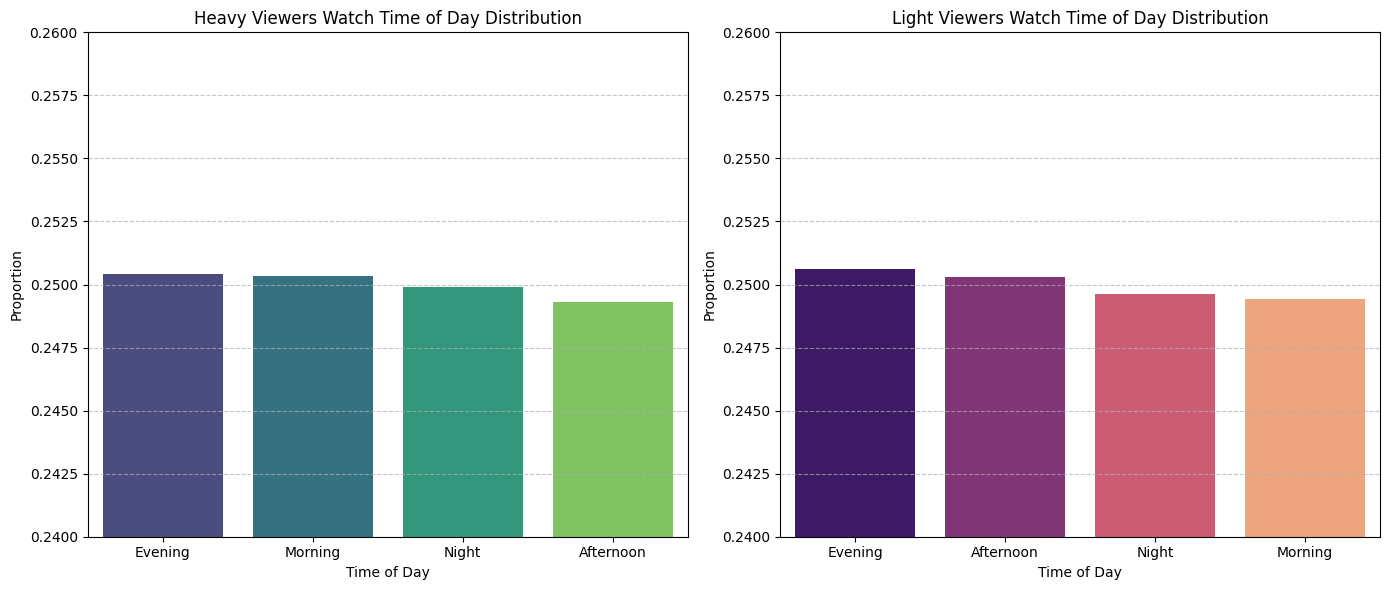

In [ ]:
heavy_time_of_day_distribution = heavy_viewers_df['watch_time_of_day'].value_counts(normalize=True)
light_time_of_day_distribution = light_viewers_df['watch_time_of_day'].value_counts(normalize=True)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(
    x=heavy_time_of_day_distribution.index,
    y=heavy_time_of_day_distribution.values,
    palette='viridis'
)
plt.title('Heavy Viewers Watch Time of Day Distribution')
plt.xlabel('Time of Day')
plt.ylabel('Proportion')
plt.ylim(0.24, 0.26)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.subplot(1, 2, 2)
sns.barplot(
    x=light_time_of_day_distribution.index,
    y=light_time_of_day_distribution.values,
    palette='magma'
)
plt.title('Light Viewers Watch Time of Day Distribution')
plt.xlabel('Time of Day')
plt.ylabel('Proportion')
plt.ylim(0.24, 0.26)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



<div dir="rtl" style="text-align: right;">


---



## تصنيف الفيديوهات حسب المدة

تقسيم الفيديوهات إلى فئات 'قصيرة' و 'متوسطة' و 'طويلة' بناءً على عمود `video_duration`.

</div>

In [ ]:
import numpy as np

df['video_duration_category'] = np.select(
    [
        df['video_duration'] < 300,
        (df['video_duration'] >= 300) & (df['video_duration'] <= 1800),
        df['video_duration'] > 1800
    ],
    ['short', 'mid', 'long'],
    default='غير محدد'
)

print(df['video_duration_category'].value_counts())


video_duration_category
long     503298
mid      419270
short     75432
Name: count, dtype: int64



<div dir="rtl" style="text-align: right;">


## حساب متوسط نسبة المشاهدة لكل فئة

</div>

/tmp/ipython-input-1914265833.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


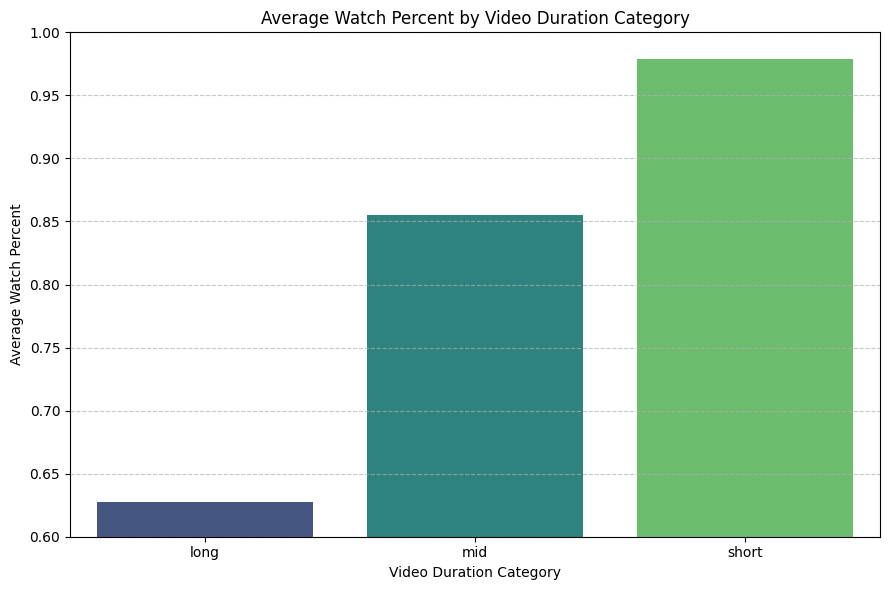

In [ ]:
average_watch_percent_by_duration_category = df.groupby('video_duration_category')['watch_percent'].mean()

plt.figure(figsize=(9, 6))
sns.barplot(
    x=average_watch_percent_by_duration_category.index,
    y=average_watch_percent_by_duration_category.values,
    palette='viridis'
)
plt.title('Average Watch Percent by Video Duration Category')
plt.xlabel('Video Duration Category')
plt.ylabel('Average Watch Percent')
plt.ylim(0.6, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



<div dir="rtl" style="text-align: right;">


### متوسط وقت المشاهدة لكل مستخدم
</div>

Descriptive statistics for average watch time per user:
count    99990.000000
mean      1213.753829
std        286.145413
min         55.000000
25%       1020.574405
50%       1204.909091
75%       1395.000000
max       3310.000000
Name: watch_time, dtype: float64


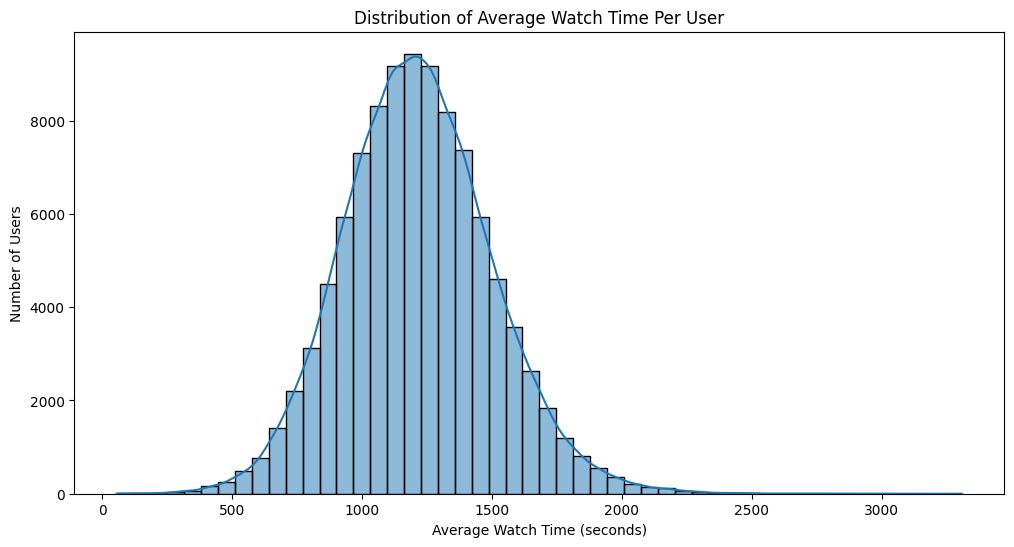

In [ ]:
average_watch_time_per_user = df.groupby('user_id')['watch_time'].mean()
print('Descriptive statistics for average watch time per user:')
print(average_watch_time_per_user.describe())
plt.figure(figsize=(12, 6))
sns.histplot(average_watch_time_per_user, bins=50, kde=True)
plt.title('Distribution of Average Watch Time Per User')
plt.xlabel('Average Watch Time (seconds)')
plt.ylabel('Number of Users')
plt.show()